<h1>EMPLOYEE EXPERIENCE ANALYSIS IN LABOR SOCIAL MEDIA</h1>
<h3>APPLYING NLP TECHNIQUES</h3>


# **Summary of previous steps**




<h2>Getting the data: Web Scraping</h2>

<h5>Data Resource: Glassdoor</h5>


Tasks I have done:
    - Getting reviews and creating a dataframe per company
    - Merging it all into an unique dataframe
    - Creating an unified .csv file
    
Issues I have found:
    - Using network headers path to log in into the website
    - Checking if all the pages are allowed to scrap or if Glassdoor is blocking any of them
    - Using Selenium to automate access, click 'cookies' and 'log in' buttons, enter credentials, etc
    - The reviews are not shown by location for all companies, which would facilitate the scrapping, 
      but I have had to do the scrapping by company and by language
      
Dataset as result:      

In [6]:
# Companies_reviews = pd.read_csv('Companies_reviews.csv')

<h2>Data Cleaning</h2>

Tasks I have done:

    - Removing columns that are not necessary
    - Removing 'NaN' values
    - Removing words from the 'Date'. Split the date in diferent columns. Drop day and month. Convert to a datetime object
    - Removing the first part of the text, before the "-", from de original 'Role' column
    - Removing locations outside of Spain
    - Joining locations by provinces
    - Adding a new column grouping provinces by regions
    - Creating a new .csv file with the dataframe updated

In [1]:
import numpy as np
import pandas as pd

/home/dsc/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [14]:
Companies_reviews_v2 = pd.read_csv('Companies_reviews_v2.csv', index_col=0)

In [15]:
Companies_reviews_v2.head()

,Company,Title,Rating,Role,Location,Pros,Contras,Language,Date_year,Region
0,Accenture,«Aprendes mucho»,"4,0",Internship Technology,BARCELONA,"Para el primer empleo esta bien, ya que aprendes",A veces haces horas extras,Español,2021,CATALUÑA
1,Accenture,«Buen lugar para aprender»,"5,0",Technology Consulting Intern,BARCELONA,Aprendes mucho acerca de proyectos importantes...,Puede ser un poco burocratico para tener acces...,Español,2021,CATALUÑA
2,Accenture,«Excelente empresa»,"5,0",Consultant,BARCELONA,8 dias de vacaciones adicionales\nFormacion co...,No encuentro desventaja al analisis,Español,2021,CATALUÑA
3,Accenture,«muchas horas proyectos aburridos»,"3,0",Consultor,BARCELONA,"Buen ambiente, buen sueldo para ser una consul...","Muchas horas, poyectos aburridos e impuestos",Español,2021,CATALUÑA
4,Accenture,«.»,"5,0",Junior Consultant,BARCELONA,"Aprendes mucho, buenos beneficios, buena geren...",hay mucha burocracia para los procesos,Español,2021,CATALUÑA


### (*) Creating a .csv file without the 'unnamed:0' index:

In [17]:
Companies_reviews_v2.to_csv('companies_reviews_v3.csv', index=False)

# **Data Exploration**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

### Evolution of total reviews per year:

In [10]:
plot_by_years = Companies_reviews_v2['Date_year'].value_counts()
plot_by_years

2020    2778
2021    1989
2019    1461
2018     963
2017     892
2016     775
2015     452
2014     237
2013     197
2012     124
2011      45
2010      41
2008      21
2009      14
Name: Date_year, dtype: int64

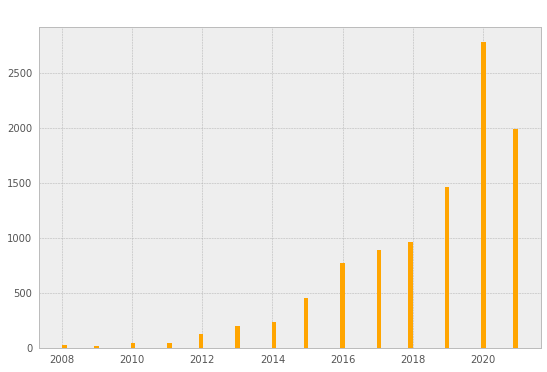

In [90]:
plt.style.use('bmh')

plt.hist(Companies_reviews_v2.Date_year, bins=100, color='orange');
plt.title('Evolution of reviews per year', fontfamily='fantasy', fontsize=18)
plt.grid(True)

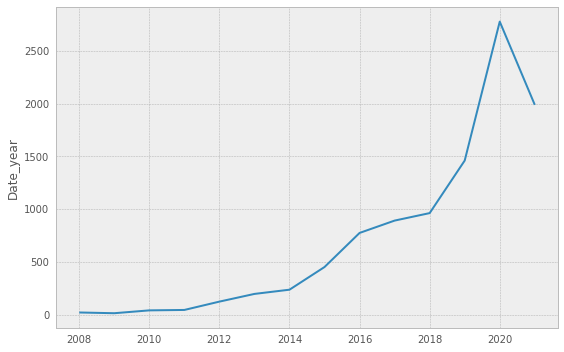

In [91]:
sns.lineplot(data=plot_by_years, x=list(plot_by_years.index), y=plot_by_years)

### Number of total reviews per language:

In [15]:
plot_by_language = Companies_reviews_v2['Language'].value_counts()
plot_by_language

Español    6298
English    3691
Name: Language, dtype: int64

Text(0.5, 1.0, 'Total reviews per language')

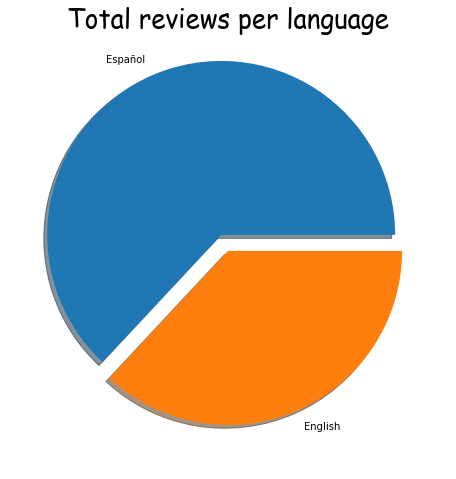

In [25]:
language = list(plot_by_language.index)
explode = (0.1, 0)

figl,ax = plt.subplots(figsize=(10, 8))
ax.pie(plot_by_language, explode=explode, labels=language, shadow=True);
ax.set_title('Total reviews per language', fontfamily='fantasy', color='black', fontsize=26)

### Number of total reviews per company:

In [9]:
plot_by_company = Companies_reviews_v2['Company'].value_counts()
plot_by_company

Accenture          909
Deloitte           735
Everis             718
Indra              667
Amazon             525
Telefonica         511
BBVA               449
Banco Santander    419
PwC                393
KPMG               389
IBM                330
HP Inc             318
Glovo              295
eDreams            283
Amadeus            258
Capgemini          248
Criteo             206
Minsait            196
HPE                186
TravelPerk         179
Sopra Steria       148
Typeform           137
GFT                128
Socialpoint        125
Atos               125
Roche              123
Vistaprint         121
EY                 117
Nestle             116
King               113
Caixabank          108
Mango              101
SEAT                99
DXC Technology      98
Adevinta            69
Novartis            47
Name: Company, dtype: int64

Text(0.5, 1.0, 'Total reviews per company')

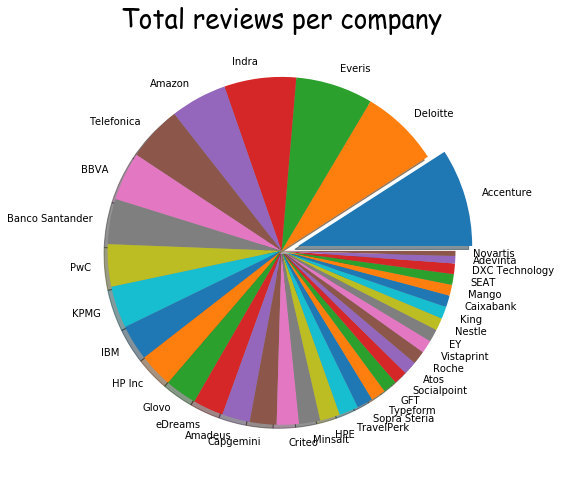

In [26]:
companies = list(plot_by_company.index)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

figl,ax = plt.subplots(figsize=(10, 8))
ax.pie(plot_by_company, explode=explode, labels=companies, shadow=True);
ax.set_title('Total reviews per company', fontfamily='fantasy', color='black', fontsize=26)

### Number of total reviews per company and by year:

In [112]:
plot_by_company_year = Companies_reviews_v2.groupby(['Date_year', 'Company'])['Company'].count()
plot_by_company_year

Date_year  Company        
2008       Accenture            3
           Banco Santander      2
           Deloitte             4
           EY                   1
           Everis               4
           IBM                  1
           Indra                2
           SEAT                 2
           Telefonica           2
2009       Accenture            2
           Amadeus              2
           Capgemini            2
           Indra                4
           Telefonica           2
           Vistaprint           2
2010       Accenture            7
           Amadeus              3
           Banco Santander      3
           Capgemini            2
           Deloitte             3
           Everis               1
           IBM                  4
           Indra                8
           Novartis             1
           PwC                  1
           Roche                2
           Sopra Steria         2
           Telefonica           2
           Vistaprint

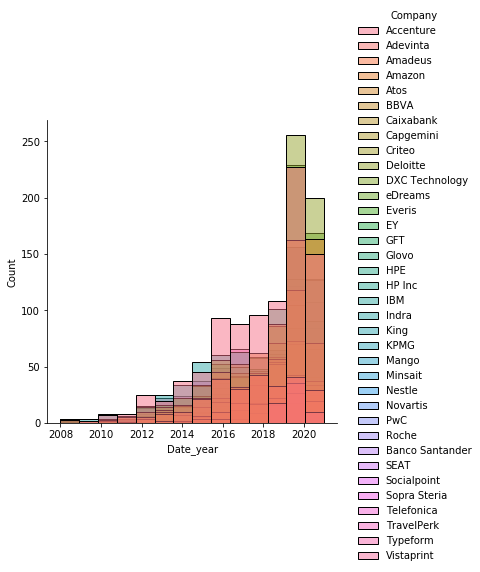

In [11]:
#Histogram
sns.displot(data=Companies_reviews_v2, x='Date_year', bins=14, hue='Company')

### Number of total reviews per region:

In [12]:
plot_by_region = Companies_reviews_v2['Region'].value_counts()
plot_by_region

MADRID                5168
CATALUÑA              3965
ANDALUCIA              195
PAIS VASCO              79
GALICIA                 64
ASTURIAS                62
CASTILLA Y LEON         50
MURCIA                  47
ISLAS CANARIAS          46
ZARAGOZA                43
CASTILLA LA MANCHA      17
ISLAS BALEARES          12
NAVARRA                  9
EXTREMADURA              4
LA RIOJA                 2
CANTABRIA                1
Name: Region, dtype: int64

Text(0.5, 1.0, 'Total reviews per region')

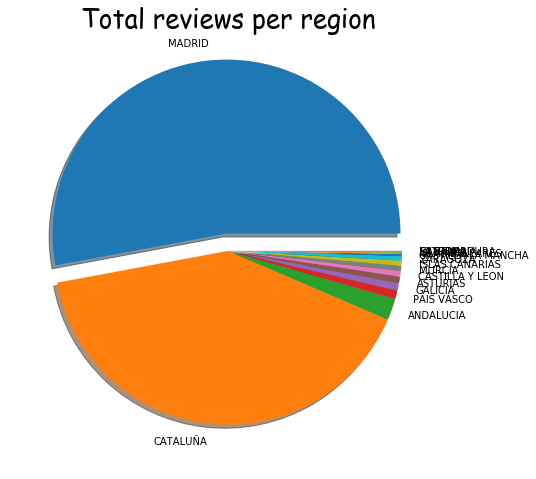

In [27]:
regions = list(plot_by_region.index)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

figl,ax = plt.subplots(figsize=(10, 8))
ax.pie(plot_by_region, explode=explode, labels=regions, shadow=True);
ax.set_title('Total reviews per region', fontfamily='fantasy', color='black', fontsize=26)

### Number of total reviews per region and location:

In [14]:
plot_by_location = Companies_reviews_v2.groupby(['Region', 'Location'])['Company'].count()
plot_by_location

Region              Location      
ANDALUCIA           ALMERIA              4
                    CORDOBA              6
                    GRANADA              6
                    JAEN                 2
                    MALAGA              56
                    SEVILLA            121
ASTURIAS            ASTURIAS            62
CANTABRIA           CANTABRIA            1
CASTILLA LA MANCHA  CIUDAD REAL         11
                    TOLEDO               6
CASTILLA Y LEON     BURGOS               5
                    LEON                11
                    SALAMANCA           21
                    VALLADOLID          13
CATALUÑA            BARCELONA         3925
                    GERONA              12
                    LERIDA              24
                    TARRAGONA            4
EXTREMADURA         BADAJOZ              4
GALICIA             LA CORUÑA           46
                    LUGO                 2
                    OURENSE              2
                   

### Explore a more interactive dashboard in Tableau:

Link: https://public.tableau.com/shared/X3JPNQJP3?:display_count=n&:origin=viz_share_link

About the interaction and description, there is more information in the memory.